# Data Visualizations for general NBA dataset

In [60]:
# important imports for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # library for interactive plots

pd.set_option('display.max_columns', None)

Reading in the data file

In [61]:
url = "NBAplayerTotals2020.csv"

basketballData = pd.read_csv("./data/"+url)

Visualizing different metrics

In [62]:
basic_stats = ['Pos','PTS', 'AST', 'TRB', 'STL']
fig = px.scatter_matrix(basketballData,
    dimensions=['BLK','PTS', 'AST', 'TRB', 'STL'],
    color="Pos")
fig.update_layout(height = 1000, width = 1000)
fig.show()

In [63]:
fig = px.box(basketballData, y="FT%", color = 'Pos', x = 'Pos',
                points='all') # can be 'outliers', or False
fig.show()

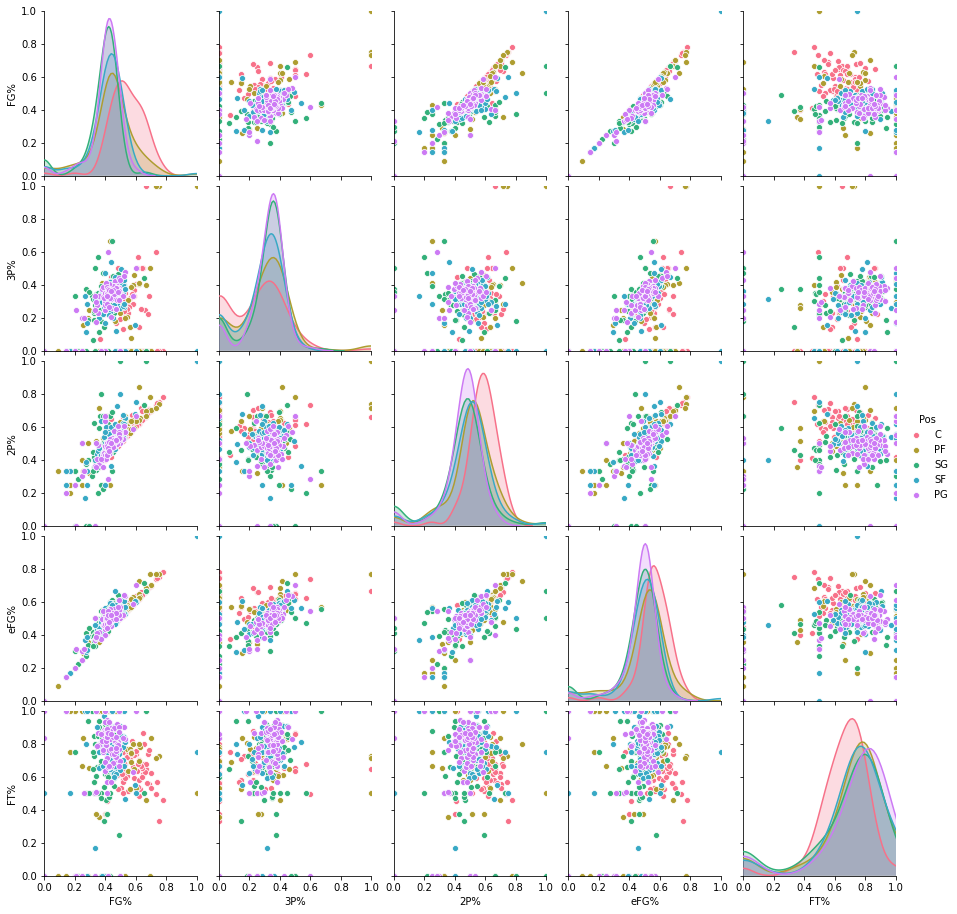

In [64]:
percent_stats = keepPercents + ['Pos']
h = sns.pairplot(basketballData[percent_stats], hue = 'Pos', palette = 'husl')
h.set(xlim = (0,1), ylim = (0,1))
plt.show(h)

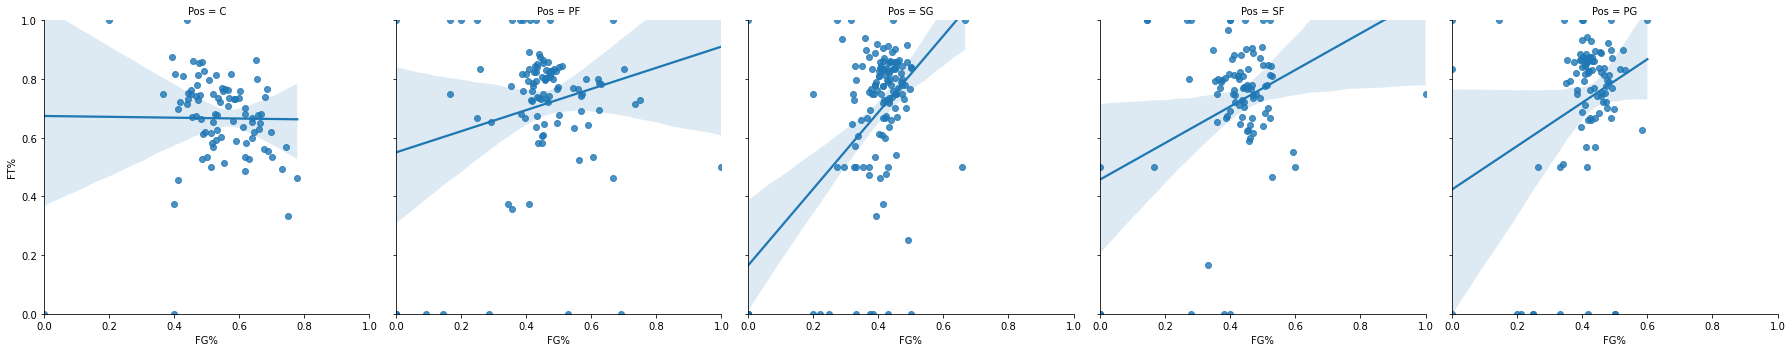

In [65]:
g = sns.lmplot(x='FG%',y='FT%',data=basketballData,col='Pos')
g = (g.set_axis_labels("FG%","FT%").set(xlim = (0,1), ylim = (0,1)))
plt.show(g)

In [66]:
fig = px.scatter(basketballData, x='PTS', y='AST', color = 'Pos', hover_data = ['Player'])
fig.update_layout(title_text = 'Points vs. Assists for 2020 NBA Players')

# Top 20 Graphs and Analysis Metrics

In [67]:
sortedTS = basketballData.sort_values(['TS%'], ascending=False)
sortedTS.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA
474,Noah Vonleh,PF,24.0,DEN,4.0,0.0,17.0,3.0,3.0,1.000,1.0,1.0,1.000,2.0,2.0,1.000,1.167,1.0,2.0,0.500,3.0,4.0,7.0,1.0,0.0,0.0,2.0,2.0,8.0,1.03,21.08,2.43,0.1
28,Keita Bates-Diop,SF,24.0,DEN,2.0,0.0,19.0,2.0,2.0,1.000,0.0,0.0,0.000,2.0,2.0,1.000,1.000,3.0,4.0,0.750,0.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,7.0,0.93,9.79,-0.20,-0.0
142,Drew Eubanks,PF,22.0,SAS,14.0,3.0,130.0,21.0,28.0,0.750,1.0,1.0,1.000,20.0,27.0,0.741,0.768,8.0,11.0,0.727,8.0,27.0,35.0,5.0,2.0,6.0,10.0,21.0,51.0,0.78,14.22,5.28,0.2
346,Johnathan Motley,PF,24.0,LAC,13.0,0.0,41.0,11.0,15.0,0.733,1.0,1.0,1.000,10.0,14.0,0.714,0.767,5.0,7.0,0.714,3.0,7.0,10.0,8.0,3.0,0.0,5.0,6.0,28.0,0.77,26.51,9.19,0.3
394,Shamorie Ponds,PG,21.0,TOR,4.0,0.0,11.0,3.0,5.0,0.600,1.0,2.0,0.500,2.0,3.0,0.667,0.700,2.0,2.0,1.000,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,9.0,0.77,29.09,2.97,0.1
329,Eric Mika,PF,25.0,SAC,1.0,0.0,19.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,2.0,2.0,1.000,2.0,5.0,7.0,0.0,0.0,0.0,0.0,5.0,6.0,0.77,10.46,-0.29,-0.0
108,Tyler Cook,PF,22.0,CLE,11.0,0.0,35.0,7.0,10.0,0.700,0.0,0.0,0.000,7.0,10.0,0.700,0.700,5.0,6.0,0.833,4.0,6.0,10.0,1.0,1.0,0.0,1.0,4.0,19.0,0.75,19.28,4.06,0.1
182,Jeff Green,PF,33.0,HOU,10.0,0.0,201.0,41.0,66.0,0.621,14.0,34.0,0.412,27.0,32.0,0.844,0.727,8.0,10.0,0.800,9.0,23.0,32.0,12.0,9.0,5.0,9.0,19.0,104.0,0.74,20.91,28.23,0.9
476,Dean Wade,PF,23.0,CLE,12.0,0.0,71.0,9.0,13.0,0.692,2.0,4.0,0.500,7.0,9.0,0.778,0.769,0.0,1.0,0.000,3.0,16.0,19.0,2.0,2.0,4.0,3.0,8.0,20.0,0.74,15.32,4.05,0.1
415,Mitchell Robinson,C,21.0,NYK,61.0,7.0,1412.0,253.0,341.0,0.742,0.0,0.0,0.000,253.0,341.0,0.742,0.742,84.0,148.0,0.568,186.0,242.0,428.0,36.0,52.0,119.0,37.0,194.0,590.0,0.73,22.12,242.78,8.1


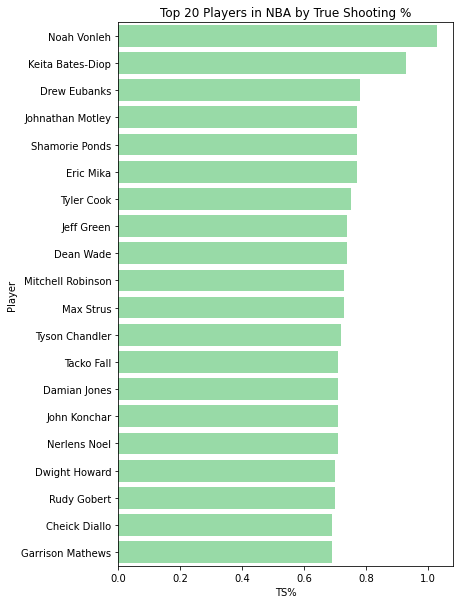

In [68]:
TStop20 = sortedTS.head(20) #select top 20
f, ax = plt.subplots(figsize=(6, 10))
plt.title('Top 20 Players in NBA by True Shooting %')
sns.set_color_codes("pastel")
sns.barplot(x="TS%", y="Player", data=TStop20, color="g")

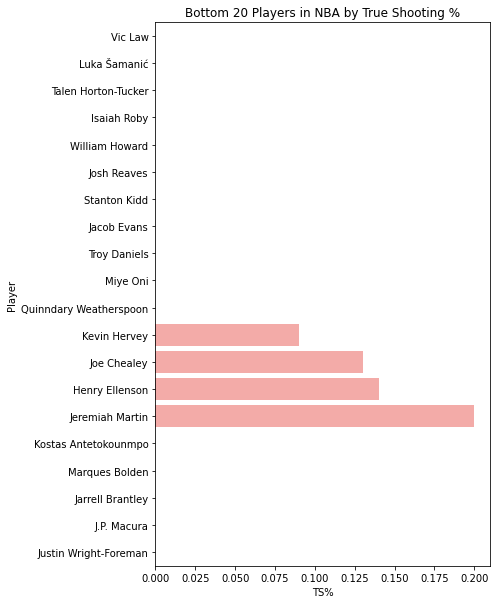

In [69]:
TSbottom20 = sortedTS.tail(20)
f, ax = plt.subplots(figsize=(6, 10))
plt.title('Bottom 20 Players in NBA by True Shooting %')
TSbottom20 = TSbottom20.sort_values(by = 'TS%', ascending = True)

sns.set_color_codes("pastel")
sns.barplot(x="TS%", y="Player", data=TSbottom20, color="r")

In [70]:
sortedPER = basketballData.sort_values(['PER'], ascending=False)
sortedPER.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA
394,Shamorie Ponds,PG,21.0,TOR,4.0,0.0,11.0,3.0,5.0,0.600,1.0,2.0,0.500,2.0,3.0,0.667,0.700,2.0,2.0,1.000,0.0,1.0,1.0,2.0,0.0,1.0,0.0,2.0,9.0,0.77,29.09,2.97,0.1
11,Giannis Antetokounmpo,PF,25.0,MIL,57.0,57.0,1763.0,623.0,1139.0,0.547,83.0,271.0,0.306,540.0,868.0,0.622,0.583,361.0,570.0,0.633,130.0,653.0,783.0,329.0,59.0,58.0,209.0,173.0,1690.0,0.61,28.77,454.43,15.1
346,Johnathan Motley,PF,24.0,LAC,13.0,0.0,41.0,11.0,15.0,0.733,1.0,1.0,1.000,10.0,14.0,0.714,0.767,5.0,7.0,0.714,3.0,7.0,10.0,8.0,3.0,0.0,5.0,6.0,28.0,0.77,26.51,9.19,0.3
447,Max Strus,SG,23.0,CHI,2.0,0.0,6.0,2.0,3.0,0.667,0.0,1.0,0.000,2.0,2.0,1.000,0.667,1.0,1.0,1.000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.73,25.77,1.37,0.0
145,Tacko Fall,C,24.0,BOS,6.0,0.0,24.0,9.0,12.0,0.750,0.0,0.0,0.000,9.0,12.0,0.750,0.750,1.0,3.0,0.333,0.0,11.0,11.0,0.0,0.0,2.0,3.0,5.0,19.0,0.71,25.33,5.28,0.2
243,LeBron James,PG,35.0,LAL,60.0,60.0,2094.0,586.0,1176.0,0.498,133.0,381.0,0.349,453.0,795.0,0.570,0.555,239.0,343.0,0.697,59.0,414.0,473.0,636.0,74.0,30.0,239.0,106.0,1544.0,0.58,25.28,446.30,14.9
327,Chimezie Metu,PF,22.0,SAS,16.0,0.0,73.0,20.0,35.0,0.571,0.0,1.0,0.000,20.0,34.0,0.588,0.571,6.0,8.0,0.750,10.0,16.0,26.0,6.0,1.0,4.0,5.0,4.0,46.0,0.60,24.63,14.31,0.5
461,Karl-Anthony Towns,C,24.0,MIN,35.0,35.0,1187.0,316.0,622.0,0.508,114.0,277.0,0.412,202.0,345.0,0.586,0.600,180.0,226.0,0.796,95.0,283.0,378.0,153.0,33.0,42.0,110.0,117.0,926.0,0.64,24.27,242.18,8.1
234,Kyrie Irving,PG,27.0,BRK,20.0,20.0,658.0,199.0,416.0,0.478,56.0,142.0,0.394,143.0,274.0,0.522,0.546,94.0,102.0,0.922,22.0,81.0,103.0,128.0,27.0,10.0,52.0,53.0,548.0,0.59,24.25,130.13,4.3
494,Hassan Whiteside,C,30.0,POR,61.0,61.0,1911.0,418.0,676.0,0.618,4.0,7.0,0.571,414.0,669.0,0.619,0.621,153.0,225.0,0.680,244.0,625.0,869.0,74.0,24.0,187.0,117.0,179.0,993.0,0.64,23.61,371.08,12.4


In [71]:
sortedPER['PER'].describe()
PERtop20 = sortedPER.head(20) #grab the top 20 players

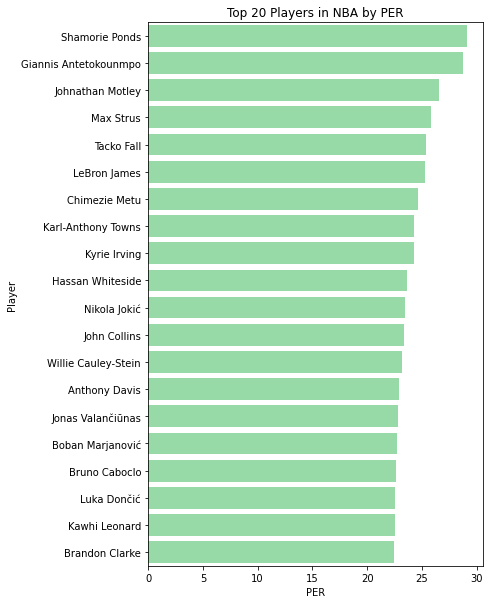

In [72]:
f, ax = plt.subplots(figsize=(6, 10))
plt.title('Top 20 Players in NBA by PER')
sns.set_color_codes("pastel")
sns.barplot(x="PER", y="Player", data=PERtop20, color="g")

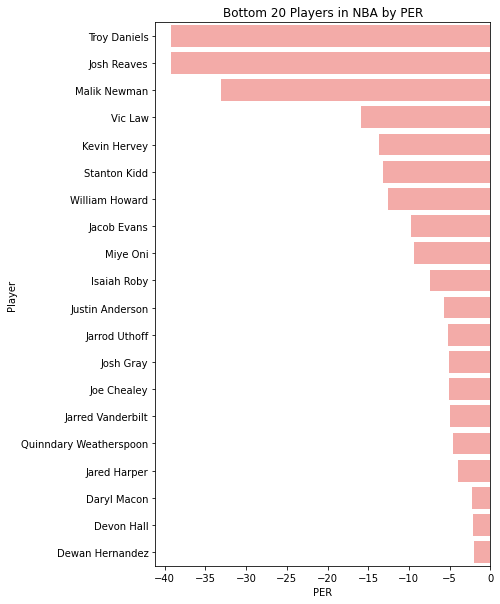

In [73]:
f, ax = plt.subplots(figsize=(6, 10))
PERbottom20 = sortedPER.tail(20)
PERbottom20 = PERbottom20.sort_values(by = 'PER', ascending = True)
plt.title('Bottom 20 Players in NBA by PER')
sns.barplot(x="PER", y="Player", data=PERbottom20, color="r")

Let's try 2 more metrics now, Value added (VA) and Estimated wins added (EWA)

In [74]:
sortedVA = basketballData.sort_values(['VA'], ascending=False)
sortedVA.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA
11,Giannis Antetokounmpo,PF,25.0,MIL,57.0,57.0,1763.0,623.0,1139.0,0.547,83.0,271.0,0.306,540.0,868.0,0.622,0.583,361.0,570.0,0.633,130.0,653.0,783.0,329.0,59.0,58.0,209.0,173.0,1690.0,0.61,28.77,454.43,15.1
243,LeBron James,PG,35.0,LAL,60.0,60.0,2094.0,586.0,1176.0,0.498,133.0,381.0,0.349,453.0,795.0,0.570,0.555,239.0,343.0,0.697,59.0,414.0,473.0,636.0,74.0,30.0,239.0,106.0,1544.0,0.58,25.28,446.30,14.9
254,Nikola Jokić,C,24.0,DEN,65.0,65.0,2101.0,512.0,969.0,0.528,71.0,226.0,0.314,441.0,743.0,0.594,0.565,218.0,268.0,0.813,155.0,508.0,663.0,446.0,77.0,43.0,202.0,200.0,1313.0,0.60,23.45,402.95,13.4
494,Hassan Whiteside,C,30.0,POR,61.0,61.0,1911.0,418.0,676.0,0.618,4.0,7.0,0.571,414.0,669.0,0.619,0.621,153.0,225.0,0.680,244.0,625.0,869.0,74.0,24.0,187.0,117.0,179.0,993.0,0.64,23.61,371.08,12.4
191,James Harden,SG,30.0,HOU,61.0,61.0,2241.0,603.0,1386.0,0.435,271.0,769.0,0.352,332.0,617.0,0.538,0.533,619.0,719.0,0.861,64.0,324.0,388.0,450.0,106.0,53.0,273.0,206.0,2096.0,0.62,20.33,328.79,11.0


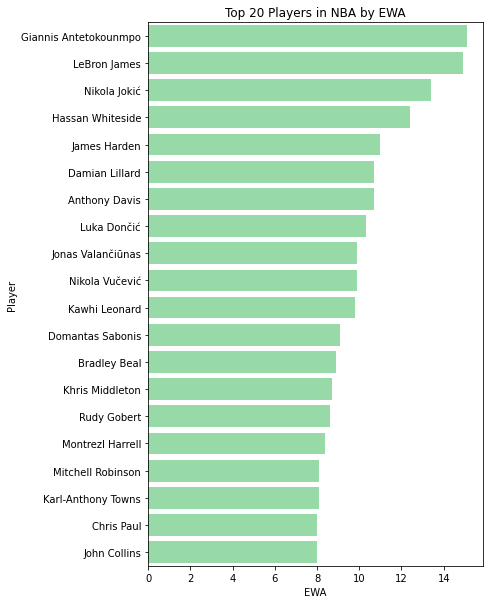

In [75]:
VAtop20 = sortedVA.head(20) #grab the top 20 players
f, ax = plt.subplots(figsize=(6, 10))
plt.title('Top 20 Players in NBA by EWA')
sns.set_color_codes("pastel")
sns.barplot(x="EWA", y="Player", data=VAtop20, color="g")

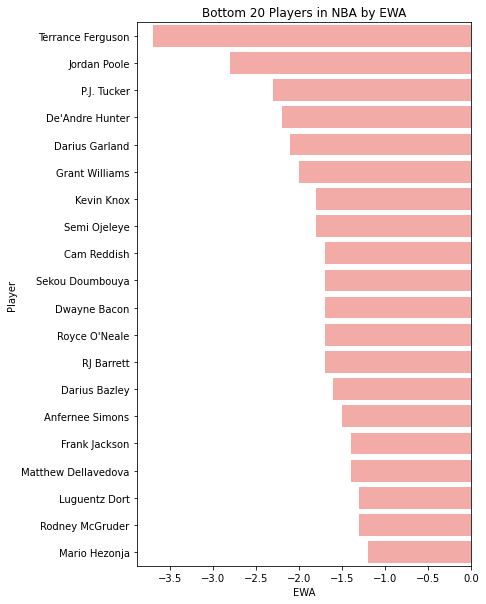

In [76]:
VAbottom20 = sortedVA.tail(20) #bottom 20 players
VAbottom20 = VAbottom20.sort_values(by = 'EWA', ascending = True)
f, ax = plt.subplots(figsize=(6, 10))
plt.title('Bottom 20 Players in NBA by EWA')
sns.set_color_codes("pastel")
sns.barplot(x="EWA", y="Player", data=VAbottom20, color="r")

In [77]:
basketballData.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,PER,VA,EWA
0,Steven Adams,C,26.0,OKC,58.0,58.0,1564.0,262.0,443.0,0.591,1.0,3.0,0.333,261.0,440.0,0.593,0.593,108.0,183.0,0.590,196.0,347.0,543.0,141.0,50.0,65.0,86.0,111.0,633.0,0.60,19.40,205.42,6.8
1,Bam Adebayo,PF,22.0,MIA,65.0,65.0,2235.0,408.0,719.0,0.567,1.0,13.0,0.077,407.0,706.0,0.576,0.568,236.0,342.0,0.690,165.0,518.0,683.0,333.0,78.0,85.0,185.0,164.0,1053.0,0.61,18.42,230.84,7.7
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,1754.0,391.0,793.0,0.493,61.0,157.0,0.389,330.0,636.0,0.519,0.532,158.0,191.0,0.827,103.0,289.0,392.0,129.0,36.0,87.0,74.0,128.0,1001.0,0.57,18.39,203.94,6.8
3,Nickeil Alexander-Walker,SG,21.0,NOP,41.0,0.0,501.0,77.0,227.0,0.339,40.0,117.0,0.342,37.0,110.0,0.336,0.427,17.0,28.0,0.607,8.0,72.0,80.0,74.0,11.0,7.0,40.0,46.0,211.0,0.44,8.87,-12.19,-0.4
4,Grayson Allen,SG,24.0,MEM,30.0,0.0,498.0,79.0,176.0,0.449,33.0,91.0,0.363,46.0,85.0,0.541,0.543,30.0,35.0,0.857,5.0,61.0,66.0,43.0,6.0,1.0,23.0,36.0,221.0,0.58,11.41,6.76,0.2


In [78]:
figure = px.scatter(basketballData, x='PER', y = 'EWA', hover_data = ['Player'], color = 'Pos')
figure.update_layout(title_text = 'PER % vs. Estimated Wins Added for 2020 NBA Players')
figure.update_xaxes(tick0=0)
figure.show()

In [79]:
figure = px.scatter(basketballData, x='PER', y = 'TS%', hover_data = ['Player'], color = 'Pos', color_continuous_scale ='viridis')
figure.update_layout(title_text = 'True Shooting % vs. PER for 2020 NBA Players')